code structure is inspired and adapted from Lab7- content of week 7 


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [4]:
def get_training_testing(training_file_path, testing_file_path):
    return [training_file_path], [testing_file_path]

In [5]:
# Split data into training and testing
training_files, testing_files = get_training_testing('/Users/sude_umac/PycharmProjects/NLP2/Propaganda_dataset /propaganda_train.tsv', '/Users/sude_umac/PycharmProjects/NLP2/Propaganda_dataset /propaganda_val.tsv')

In [6]:
# Load data 
train_data = pd.read_csv(training_files[0], sep='\t')
test_data= pd.read_csv(testing_files[0], sep='\t')
train_data.columns = ['label', 'sentence'] 

In [7]:
print(train_data.columns)

Index(['label', 'sentence'], dtype='object')


In [8]:
print(test_data.columns)

Index(['label', 'tagged_in_context'], dtype='object')


In [9]:
print(train_data['label'].value_counts())

label
not_propaganda               1191
exaggeration,minimisation     164
causal_oversimplification     158
name_calling,labeling         157
loaded_language               154
appeal_to_fear_prejudice      151
flag_waving                   148
repetition                    147
doubt                         144
Name: count, dtype: int64


label
not_propaganda               301
appeal_to_fear_prejudice      43
flag_waving                   39
doubt                         38
loaded_language               37
repetition                    32
causal_oversimplification     31
name_calling,labeling         31
exaggeration,minimisation     28
Name: count, dtype: int64


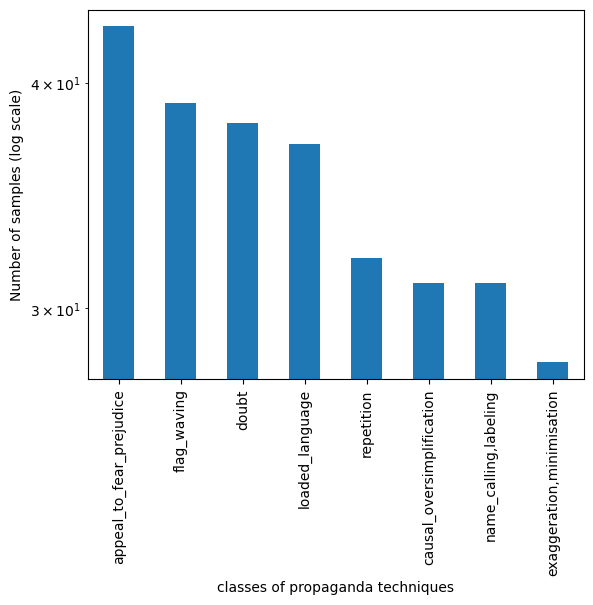

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# a) How many samples are there for each class?
class_counts = test_data['label'].value_counts()
print(class_counts)

# Remove 'not_propaganda' from the data to be plotted
class_counts = class_counts[class_counts.index != 'not_propaganda']

# Plot the data
class_counts.plot(kind='bar', logy=True)

# Add labels
plt.xlabel('classes of propaganda techniques')
plt.ylabel('Number of samples (log scale)')


plt.show()



In [11]:
# Split data into 'label' and 'sentence' 
labels = train_data['label']
sentences = train_data['sentence']

test_labels= test_data['label']
test_sentences= test_data['tagged_in_context']

# Split the training data into training and validation sets
# Here, 20% of the training data is used for validation
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)







In [88]:
# Output the validation data set
print("Validation data (features):")
print(X_test)

print("\nValidation data (labels):")
print(y_test)

# Get the number of samples for each propaganda technique
print("\nNumber of samples for each propaganda technique:")
print(y_test.value_counts())

Validation data (features):
765     Should military force be used to stop <BOS> th...
2388            We <BOS> have very good young men. <EOS> 
2163    Unlike the politicians who attempt to undermin...
1681    The status quo is not acceptable in Washington...
1815    Hungarian Prime Minister <BOS> Hits Nail On Th...
                              ...                        
2086    Bonkers conspiracy site Intellihub <BOS> poste...
1665    According to the Middle East Media Research In...
530     A police report was filed and a man was fired ...
1608    “I will always practice the <BOS> turning of t...
611     “When the Parkland <BOS> shooting <EOS> happen...
Name: sentence, Length: 483, dtype: object

Validation data (labels):
765                not_propaganda
2388               not_propaganda
2163                  flag_waving
1681     appeal_to_fear_prejudice
1815              loaded_language
                  ...            
2086    causal_oversimplification
1665                  flag

In a typical machine learning workflow, you would use your validation data set (`X_test` and `y_test` in your case) to tune your model's hyperparameters and to get an unbiased evaluation of the model fit on the training data. 

Once you are satisfied with your model's performance on the validation set, you would then use your testing data set (`propaganda_val` in your case) to get an unbiased evaluation of the final model's performance. This is the data that the model has never seen before and it gives you a sense of how well your model will perform on new, unseen data.

Here's a step-by-step breakdown:

1. Train your model using the training data set (`X_train` and `y_train`).
2. Tune your model's hyperparameters and evaluate its performance using the validation data set (`X_test` and `y_test`).
3. Once you are satisfied with your model's performance on the validation set, evaluate its performance on the testing data set (`propaganda_val`).

Remember, the testing data set should only be used once. You should not use it to make any changes to your model. It's meant to provide an unbiased estimate of the model's performance on new data.

In [46]:
print(y_test.value_counts())

label
not_propaganda               241
loaded_language               39
exaggeration,minimisation     35
doubt                         34
flag_waving                   32
appeal_to_fear_prejudice      29
repetition                    27
name_calling,labeling         23
causal_oversimplification     23
Name: count, dtype: int64


In [72]:
print(test_data.columns)

Index(['label', 'sentence', 'snippet', 'snippet_length'], dtype='object')


In [105]:
import matplotlib.pyplot as plt

def process_data(df, text_column):
    df['snippet'] = df[text_column].apply(lambda x: x[x.find('<BOS>')+5:x.find('<EOS>')])
    df['snippet_length'] = df['snippet'].apply(len)
    average_snippet_length = df.groupby('label')['snippet_length'].mean()
    print(average_snippet_length)

    average_snippet_length.plot(kind='bar')
    plt.xlabel('classes of propaganda techniques')
    plt.ylabel('Average length of propaganda snippet')
    plt.show()

# Now you can call this function with your dataframes
# process_data(train_data, 'sentence')
# process_data(test_data, 'tagged_in_context')

In [106]:
# Convert X_test to a DataFrame if it's not already one
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()

# Create a copy of X_test to avoid modifying the original data
validation_data = X_test.copy()

# Add y_test as a new column
validation_data['label'] = y_test

In [107]:
print(validation_data['label'].value_counts())

label
not_propaganda               241
loaded_language               39
exaggeration,minimisation     35
doubt                         34
flag_waving                   32
appeal_to_fear_prejudice      29
repetition                    27
name_calling,labeling         23
causal_oversimplification     23
Name: count, dtype: int64


label
appeal_to_fear_prejudice     103.158940
causal_oversimplification    126.645570
doubt                        122.555556
exaggeration,minimisation     46.981707
flag_waving                   64.891892
loaded_language               23.785714
name_calling,labeling         30.292994
not_propaganda                39.778338
repetition                    20.448980
Name: snippet_length, dtype: float64


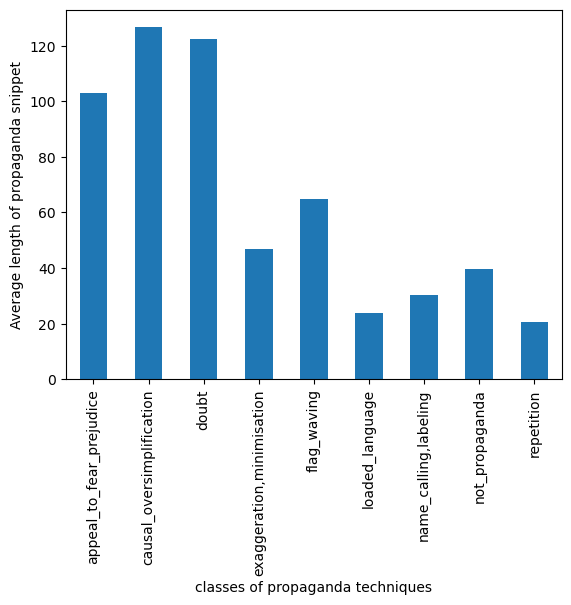

label
appeal_to_fear_prejudice      97.837209
causal_oversimplification    124.838710
doubt                        119.789474
exaggeration,minimisation     47.857143
flag_waving                   72.974359
loaded_language               23.756757
name_calling,labeling         30.870968
not_propaganda                37.544850
repetition                    20.593750
Name: snippet_length, dtype: float64


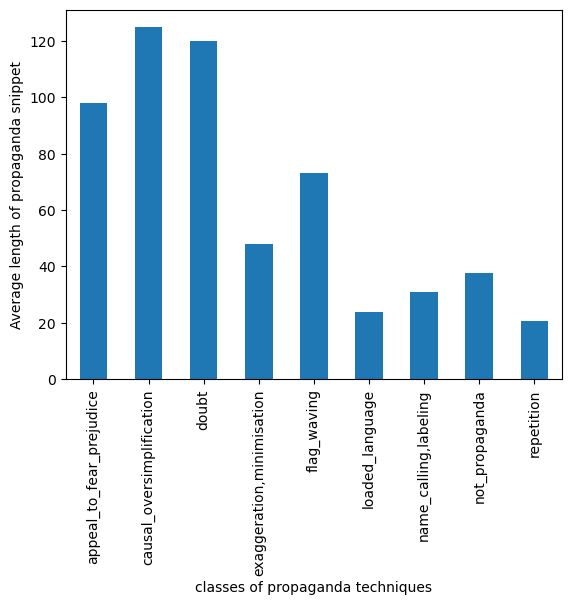

label
appeal_to_fear_prejudice     108.344828
causal_oversimplification    141.826087
doubt                        103.705882
exaggeration,minimisation     52.285714
flag_waving                   71.281250
loaded_language               23.000000
name_calling,labeling         26.217391
not_propaganda                41.037344
repetition                    22.925926
Name: snippet_length, dtype: float64


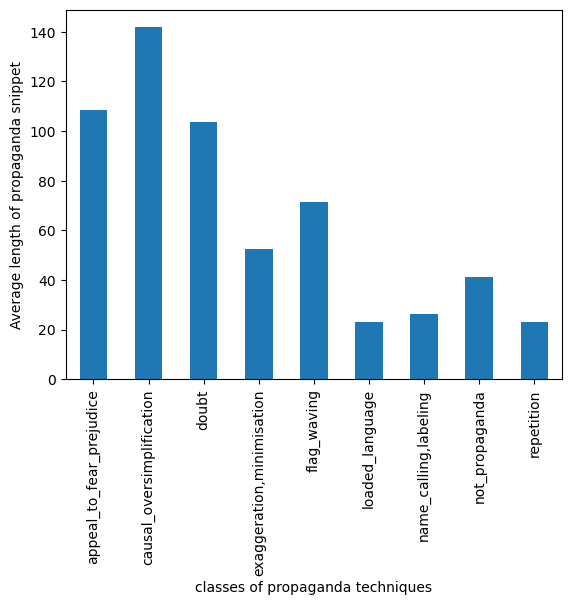

In [108]:
process_data(train_data, 'sentence')
process_data(test_data, 'tagged_in_context')
process_data(validation_data, 'sentence')